# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

# Load the data to the Train & Test variables

In [2]:
(X_train,Y_train),(x_test,y_test)= mnist.load_data()

In [3]:
print(X_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Display of data


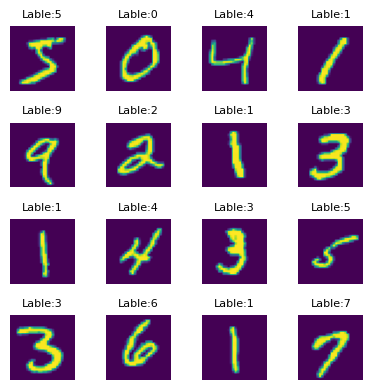

In [4]:
plt.figure(figsize=(4,4))
for i in range (16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(f"Lable:{Y_train[i]}",fontsize=8)
plt.tight_layout()
plt.show()

# Normalization of Pixel Values

In [5]:
X_train,x_test= X_train/255 , x_test/255

# Categorization of Labels

In [23]:
Y_train = to_categorical(Y_train, num_classes=10)

# Expansion of Dimensons for the Convolutnal Layer

In [7]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

# Building Convolutnal Nural Network (CNN)

In [8]:
cnn = Sequential([Conv2D(32,(4,4),activation='relu',input_shape=(28,28,1)),
                  MaxPooling2D((2,2)),
                  Conv2D(64,(4,4),activation='relu'),
                  MaxPooling2D((2,2)),
                  Flatten(),
                  Dense(64,activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(10,activation='softmax')])

In [9]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
cnn.fit(X_train,Y_train)

1875/1875 [==============================] - 69s 35ms/step - loss: 0.1555 - accuracy: 0.9518


# Predection

In [11]:
a = X_train[0].reshape(1,28,28,1)
np.argmax(cnn.predict(a))

1/1 [==============================] - 0s 310ms/step


5

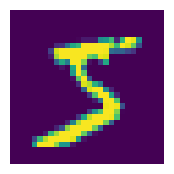

In [19]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

# Saving the Model 

In [22]:
cnn.save('model.h5')